<a href="https://colab.research.google.com/github/demitw/Machine-learning-coursework/blob/model/Model_Training/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Drop rows with 'unknown' in 'loan' or 'housing' columns
df_cleaned = df[(df['loan'] != 'unknown') & (df['housing'] != 'unknown')]

# Check the shape of the new dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (41188, 21)
Cleaned dataset shape: (40198, 21)


In [ ]:
# Drop the 'duration' column
df_cleaned = df_cleaned.drop(columns=['duration'])

# Drop the 'default' column
df_cleaned = df_cleaned.drop(columns=['default'])

# Check the result
print(df_cleaned.head())


   age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   
2         mon         1    999         0  nonexistent           1.1   
3         mon         1    999         0  nonexistent           1.1   
4         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1       

In [ ]:
# Convert 'pdays' column to binary
df_cleaned['pdays'] = df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Check the result
print(df_cleaned['pdays'].head())


0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64


In [ ]:
# Check unique values in the 'pdays' column
unique_pdays = df_cleaned['pdays'].unique()

# Print the unique values
print(unique_pdays)


[0 1]


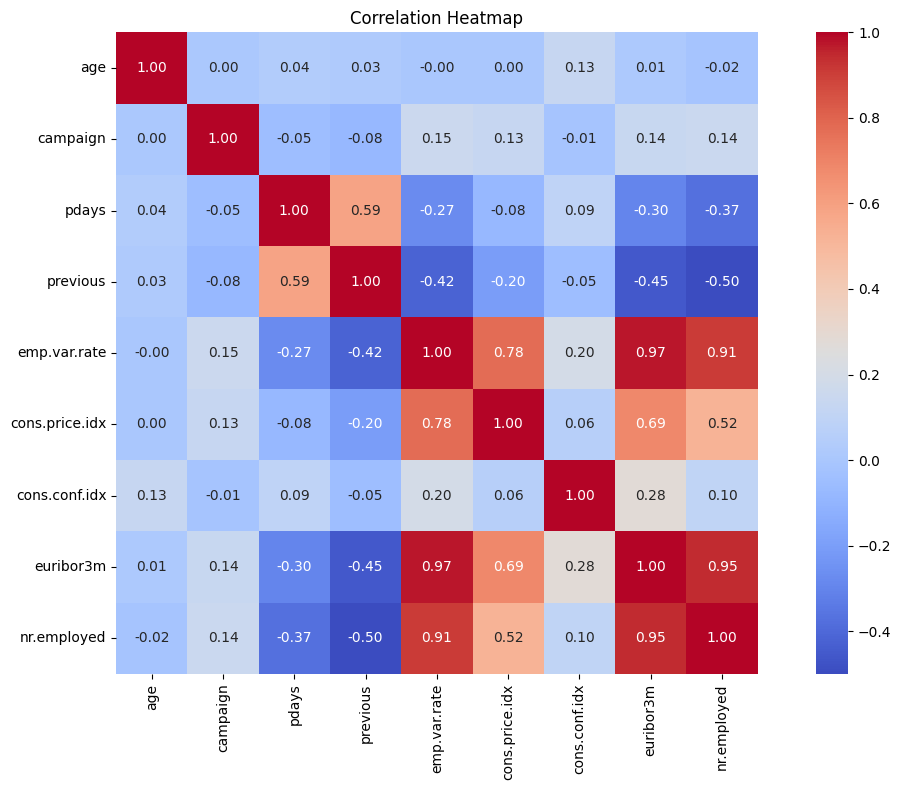

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
# Check for missing values in each column
print(df_cleaned.isnull().sum())

missing_percentage = df_cleaned.isnull().sum() / len(df) * 100
print(missing_percentage)

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features_to_pca = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
x = df_cleaned[features_to_pca].values

# Standardize the data
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df_cleaned.index) # Key Change: add index

# Concatenate the PCA results with the rest of your data
df_cleaned = pd.concat([df_cleaned, pca_df], axis=1)

# Drop original correlated features
df_cleaned = df_cleaned.drop(features_to_pca, axis=1)

print(df_cleaned.isnull().sum()) #check for missing values
print(df_cleaned.dtypes) #check for datatypes

age              0
job              0
marital          0
education        0
housing          0
loan             0
contact          0
month            0
day_of_week      0
campaign         0
pdays            0
previous         0
poutcome         0
cons.conf.idx    0
y                0
PC1              0
PC2              0
dtype: int64
age                int64
job               object
marital           object
education         object
housing           object
loan              object
contact           object
month             object
day_of_week       object
campaign           int64
pdays              int64
previous           int64
poutcome          object
cons.conf.idx    float64
y                 object
PC1              float64
PC2              float64
dtype: object


In [ ]:
# Check for missing values in each column
print(df_cleaned.isnull().sum())

missing_percentage = df_cleaned.isnull().sum() / len(df) * 100
print(missing_percentage)

age              0
job              0
marital          0
education        0
housing          0
loan             0
contact          0
month            0
day_of_week      0
campaign         0
pdays            0
previous         0
poutcome         0
cons.conf.idx    0
y                0
PC1              0
PC2              0
dtype: int64
age              0.0
job              0.0
marital          0.0
education        0.0
housing          0.0
loan             0.0
contact          0.0
month            0.0
day_of_week      0.0
campaign         0.0
pdays            0.0
previous         0.0
poutcome         0.0
cons.conf.idx    0.0
y                0.0
PC1              0.0
PC2              0.0
dtype: float64


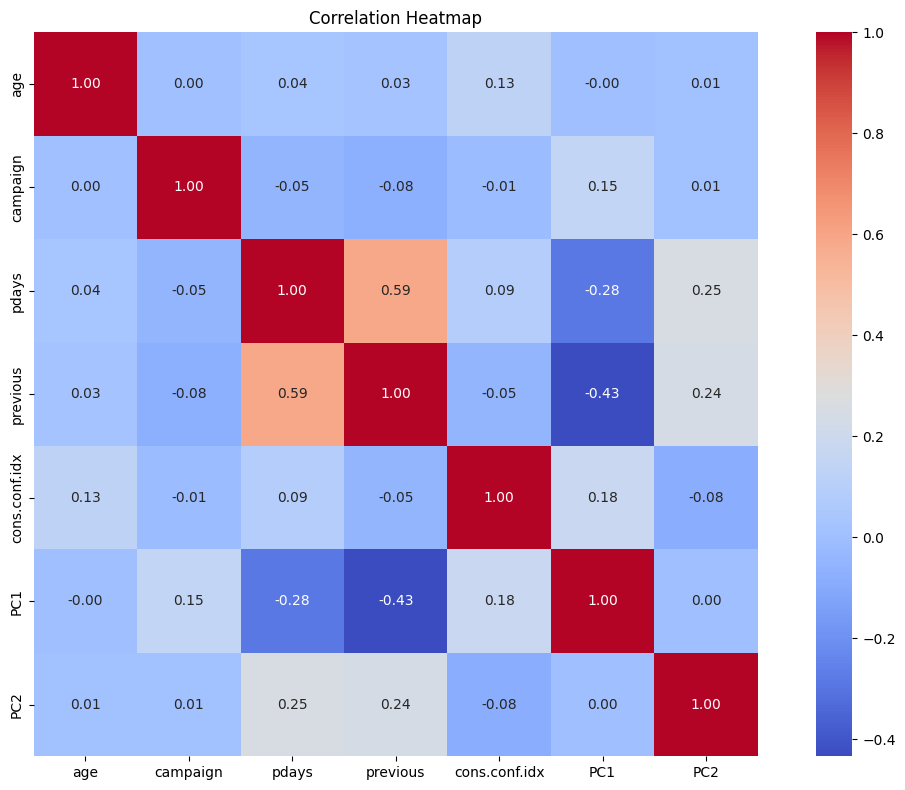

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Explicitly specify all months for consistent one-hot encoding
all_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ensure 'month' column has all months as categories
df_cleaned['month'] = pd.Categorical(df_cleaned['month'], categories=all_months, ordered=True)

# Apply One-Hot Encoding to categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=[
    'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'
])

# Apply Label Encoding to binary categorical features
label_encoder = LabelEncoder()

# Binary categorical columns to label encode
binary_columns = [ 'housing', 'loan', 'y']

# Apply Label Encoding to binary columns
for col in binary_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Check the first few rows of the encoded dataframe
print(df_encoded.head())

# Check that all month columns are present
print(df_encoded.filter(like='month_').columns)


   age  housing  loan  campaign  pdays  previous  cons.conf.idx  y       PC1  \
0   56        0     0         1      0         0          -36.4  0  1.201793   
1   57        0     0         1      0         0          -36.4  0  1.201793   
2   37        1     0         1      0         0          -36.4  0  1.201793   
3   40        0     0         1      0         0          -36.4  0  1.201793   
4   56        0     1         1      0         0          -36.4  0  1.201793   

        PC2  ...  month_nov  month_dec  day_of_week_fri  day_of_week_mon  \
0  0.296743  ...      False      False            False             True   
1  0.296743  ...      False      False            False             True   
2  0.296743  ...      False      False            False             True   
3  0.296743  ...      False      False            False             True   
4  0.296743  ...      False      False            False             True   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome

In [ ]:
# Display all columns with their data types
print(df_encoded.dtypes)


age                                int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
cons.conf.idx                    float64
y                                  int64
PC1                              float64
PC2                              float64
job_admin.                          bool
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
job_unknown                         bool
marital_divorced                    bool
marital_married                     bool
marital_single  

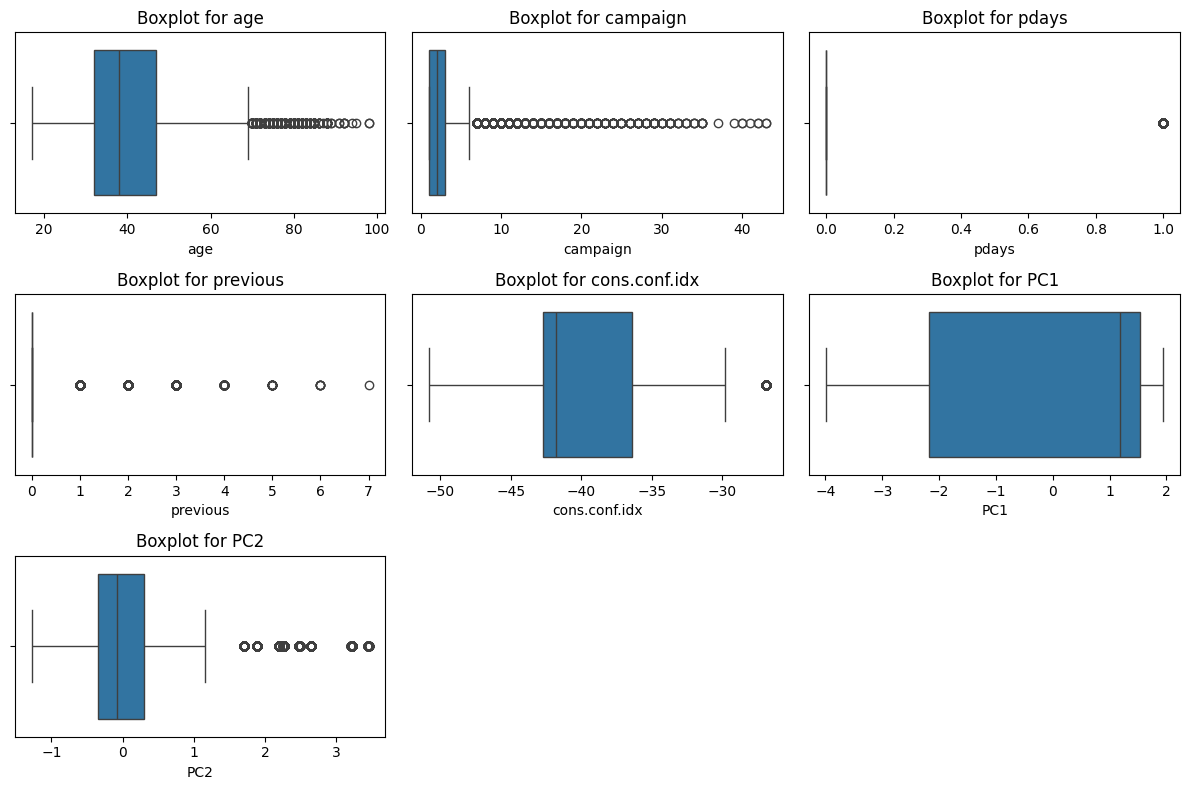

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size as needed
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


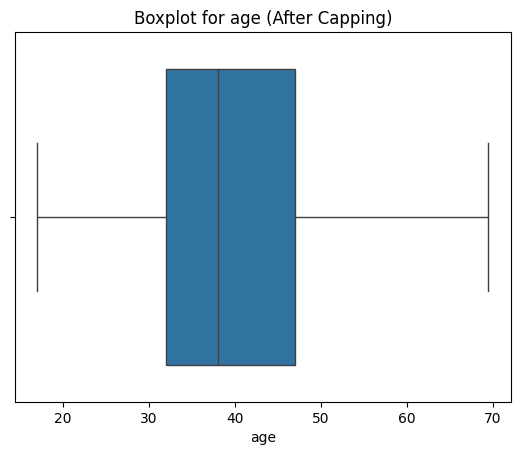

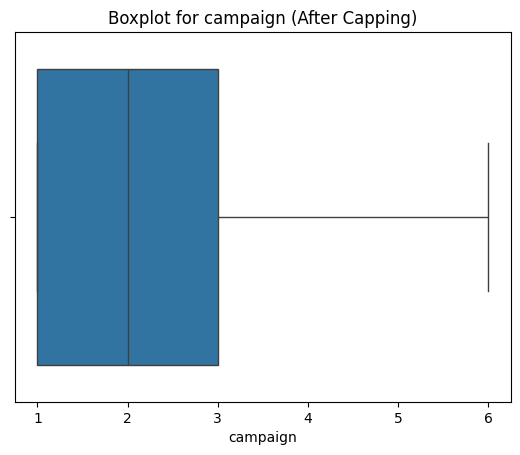

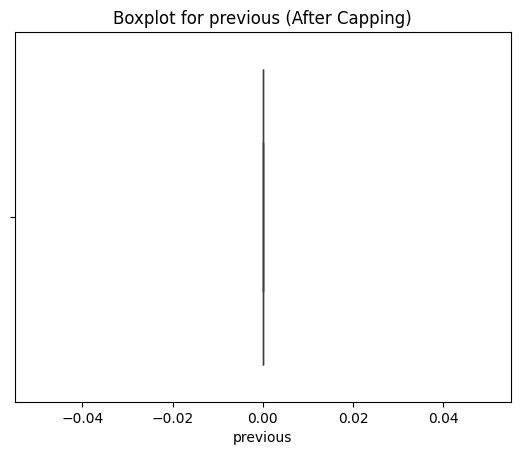

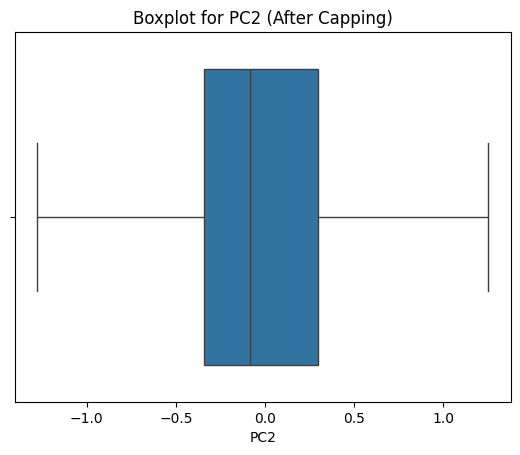

age          54
campaign      6
previous      1
PC2         252
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

def cap_outliers(df, column, factor=1.5):
    """Caps outliers in a DataFrame column using the IQR method.

    Args:
        df: The Pandas DataFrame.
        column: The name of the column to cap outliers in.
        factor: The factor to multiply the IQR by (default is 1.5).

    Returns:
        The DataFrame with capped outliers.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + factor * iqr
    lower_bound = q1 - factor * iqr
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Assuming 'df_encoded' is your DataFrame after encoding
columns_to_cap = ['age', 'campaign', 'previous', 'PC2']

for column in columns_to_cap:
    df_encoded = cap_outliers(df_encoded, column)

# Verify the changes (optional)
import matplotlib.pyplot as plt
import seaborn as sns

for col in columns_to_cap:
    plt.figure()
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Boxplot for {col} (After Capping)')
    plt.show()

# Print the number of unique values in each column
print(df_encoded[columns_to_cap].nunique())

In [ ]:
# Check unique values in the 'pdays' column
unique_pdays = df_encoded['pdays'].unique()

# Print the unique values
print(unique_pdays)


[0 1]


Training Accuracy: 0.9471
Testing Accuracy: 0.8913
Test F1 Score: 0.8786
Weighted Precision: 0.8733
Weighted Recall: 0.8913

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7133
           1       0.53      0.31      0.39       907

    accuracy                           0.89      8040
   macro avg       0.72      0.64      0.67      8040
weighted avg       0.87      0.89      0.88      8040



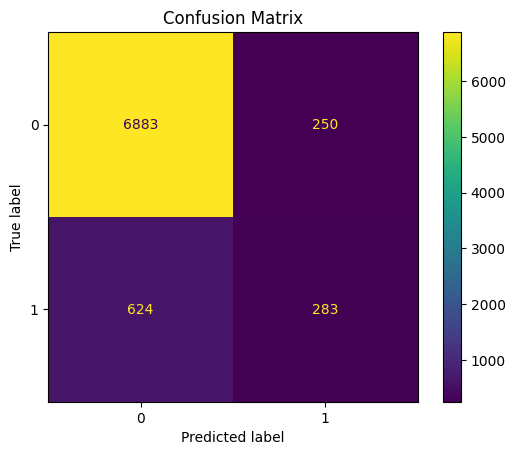

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Split Data:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Oversampling with SMOTE:
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Scale Numerical Features (using resampled data):
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Convert to numpy arrays
X_train_resampled = X_train_resampled.values
X_test = X_test.values
y_train_resampled = y_train_resampled.values
y_test = y_test.values

# 4. Train Neural Network (MLPClassifier) - Improved Parameters (WITHOUT class_weight):
mlp = MLPClassifier(hidden_layer_sizes=(150, 75, 25),  # More complex architecture
                    activation='relu',
                    solver='adam',
                    alpha=0.001,  # Increased regularization
                    batch_size=256, # Increased batch size
                    learning_rate='adaptive', # Use adaptive learning rate
                    learning_rate_init=0.0005, # Adjusted learning rate
                    max_iter=1000, # Increased max iterations
                    random_state=42,
                    early_stopping=True,
                    n_iter_no_change=20, # Increased patience for early stopping
                    verbose=False)

mlp.fit(X_train_resampled, y_train_resampled)

# 5. Evaluate the Model:
y_train_pred = mlp.predict(X_train_resampled)
y_test_pred = mlp.predict(X_test)

training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Added weighted average to F1 score

# Weighted Precision, Recall, F1-score
precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
recall_weighted = recall_score(y_test, y_test_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=mlp.classes_)

# Print results
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")

# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix Display
conf_matrix_display.plot()
plt.title('Confusion Matrix')
plt.show()
